<h1 align=center><font size = 6>Breast Cancer Classifier</font></h1>

Disease detection tasks are one of the many applications for which classification models can be used. Assessing whether a tumor is malignant or benign based on its characteristics and based on a previous history may be possible using one of these models.

Using a dataset with more than 500 previous samples, in this notebook we are going to build a model for the detection of breast cancer. To achieve the most efficient model, we are going to analyze 4 different models based on logistic regression, K-Nearest neighbor, decision trees and support vector machines. Finally, we will compare its performance and accuracy.

__IMPORTANT NOTE__: This notebook was made by __Alejandro Velázquez Portas__ (<a href="https://www.linkedin.com/in/alexvelazquezp/">LinkedIn profile</a>). Take this into account when reproducing or citing its content.

# 1. Data wrangling

Let's import all necessary libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn import metrics
from sklearn import svm
import time
import itertools
from six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
import warnings

We start importing the original data from de csv file.

In [2]:
df = pd.read_csv('Breast Cancer Wisconsin.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Let's take a look to all column names, types and null values:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

There is a column with no information, only with null values. In addition, the _id_ column will not provide us any information, so we can delete both.

In [4]:
df.drop(columns=['id', 'Unnamed: 32'], inplace=True)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Now that we have all the necessary columns, we can make a small summary of what their content is, especially for those with medical knowledge:
<ul>
    <li>diagnosis: The diagnosis of breast tissues (M = malignant, B = benign)</li>
    <li>radius_mean: mean of distances from center to points on the perimeter</li>
    <li>texture_mean: standard deviation of gray-scale values</li>
    <li>perimeter_mean: mean size of the core tumor</li>
    <li>area_mean</li>
    <li>smoothness_mean: mean of local variation in radius lengths</li>
    <li>compactness_mean: mean of perimeter^2 / area - 1.0</li>
    <li>concavity_mean: mean of severity of concave portions of the contour</li>
    <li>concave points_mean: mean for number of concave portions of the contour</li>
    <li>symmetry_mean</li>
    <li>fractal_dimension_mean: mean for "coastline approximation" - 1</li>
    <li>radius_se: standard error for the mean of distances from center to points on the perimeter</li>
    <li>texture_se: standard error for standard deviation of gray-scale values</li>
    <li>perimeter_se</li>
    <li>area_se</li>
    <li>smoothness_se: standard error for local variation in radius lengths</li>
    <li>compactness_se: standard error for perimeter^2 / area - 1.0</li>
    <li>concavity_se: standard error for severity of concave portions of the contour</li>
    <li>concave points_se: standard error for number of concave portions of the contour</li>
    <li>summetry_se</li>
    <li>fractal_dimension_se: standard error for "coastline approximation" - 1</li>
    <li>radius_worst: "worst" or largest mean value for mean of distances from center to points on the perimeter</li>
    <li>texture_worst: "worst" or largest mean value for standard deviation of gray-scale values</li>
    <li>perimeter_worst</li>
    <li>area_worst</li>
    <li>smoothness_worst: "worst" or largest mean value for local variation in radius lengths</li>
    <li>compactness_worst: "worst" or largest mean value for perimeter^2 / area - 1.0</li>
    <li>concavity_worst: "worst" or largest mean value for severity of concave portions of the contour</li>
    <li>concave points_worst: "worst" or largest mean value for number of concave portions of the contour</li>
    <li>symmetry_worst</li>
    <li>fractal_dimension_worst: "worst" or largest mean value for "coastline approximation" - 1</li>
</ul>

Note that our diagnosis classification is list by _M_ for malignant and _B_ for benign. Some classification models will need a numeric value instead of a string, so it will be necessary to modify this type. We will use 1 for malignant and 0 for benign.

In [5]:
df['diagnosis'].replace('M', '1', inplace=True)
df['diagnosis'].replace('B', '0', inplace=True)
df = df.astype({'diagnosis':float})
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1.0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1.0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1.0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1.0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# 2. Data analysis

Before analyzing the values, we will check one last time that there is no NaN value:

In [6]:
df.isnull().values.sum()

0

With our dataset ready, we will start by checking the number of values we have

In [7]:
df.shape

(569, 31)

We have 569 rows, or breast cancer examples, and 31 columns.

Let's take a look to the values. 

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
diagnosis,569.0,0.372583,0.483918,0.000000,0.000000,0.000000,1.000000,1.00000
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400


The main aspect that we have to take into account is that there are columns whose values are decimal less than 1 and other columns have figures of several thousand. For this reason, __normalization tasks will be necessary later__.

To show some of the most representative graphs, we must know what the relationships are between each variable. For them, we will proceed with the correlation:

In [9]:
df.corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


Due to the number of columns, a graphic view will be easier to understand:

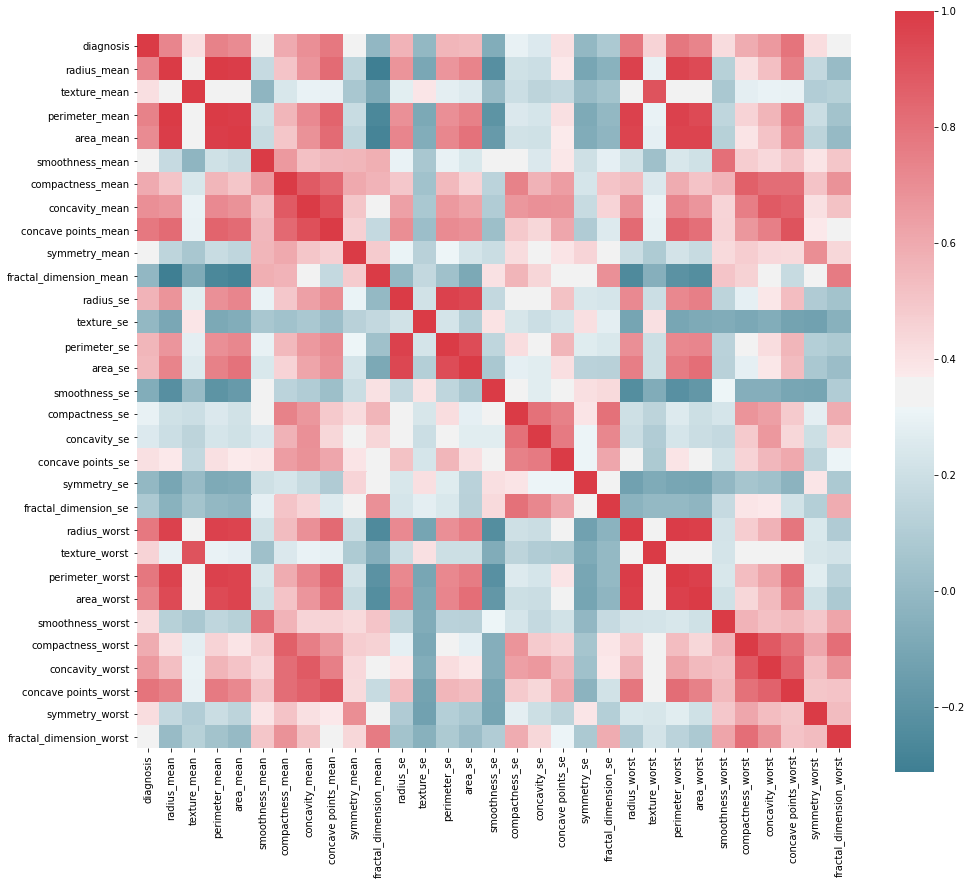

In [10]:
f, ax = plt.subplots(figsize=(16, 14))
corr = df.corr()
sns.heatmap(corr, 
            mask=np.zeros_like(corr, dtype=np.bool), 
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, 
            ax=ax
           )
plt.show()

So, what are the 5 most influential values for diagnosis?

In [11]:
diag_corr = abs(corr[['diagnosis']])  #We use abs values for sorting
diag_corr.sort_values('diagnosis', ascending=False, axis=0, inplace=True)
diag_corr.drop(diag_corr.loc[diag_corr['diagnosis']==1.0].index, inplace=True) #Delete self corr
diag_corr.head()

,diagnosis
concave points_worst,0.793566
perimeter_worst,0.782914
concave points_mean,0.776614
radius_worst,0.776454
perimeter_mean,0.742636


_Concave points_worst_ is the most influential in the diagnosis. We can check it easily in the next figure:

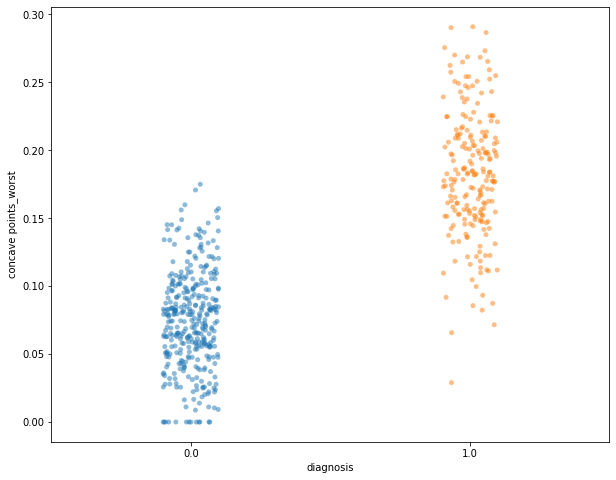

In [12]:
plt.figure(figsize=(10,8))
sns.stripplot(y='concave points_worst', x='diagnosis', data=df, marker='o', alpha=0.5)
plt.show()

The highest values (greater than 0.15), almost always correspond to malignant diagnoses, while under 0.10 are almost always benign.

This display can be repeated for other variables. If we continued comparing variables, as the correlation indices were closer to zero (less influence of the variable), the graphs would present more blue and orange points in superimposed values, the differentiation being more complex.

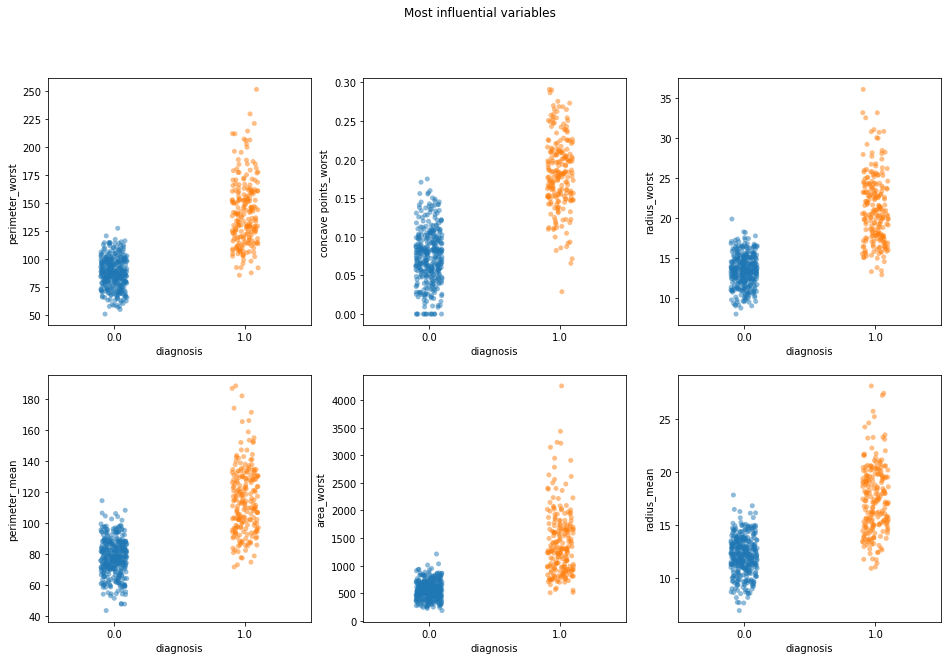

In [13]:
fig, axes = plt.subplots(2, 3, figsize=(16,10))
fig.suptitle('Most influential variables')

sns.stripplot(ax=axes[0,0], y='perimeter_worst', x='diagnosis', data=df, marker='o', alpha=0.5)
sns.stripplot(ax=axes[0,1], y='concave points_worst', x='diagnosis', data=df, marker='o', alpha=0.5)
sns.stripplot(ax=axes[0,2], y='radius_worst', x='diagnosis', data=df, marker='o', alpha=0.5)
sns.stripplot(ax=axes[1,0], y='perimeter_mean', x='diagnosis', data=df, marker='o', alpha=0.5)
sns.stripplot(ax=axes[1,1], y='area_worst', x='diagnosis', data=df, marker='o', alpha=0.5)
sns.stripplot(ax=axes[1,2], y='radius_mean', x='diagnosis', data=df, marker='o', alpha=0.5)

plt.show()

Sometimes a boxplot can also help to understand the dependencies of a variable:

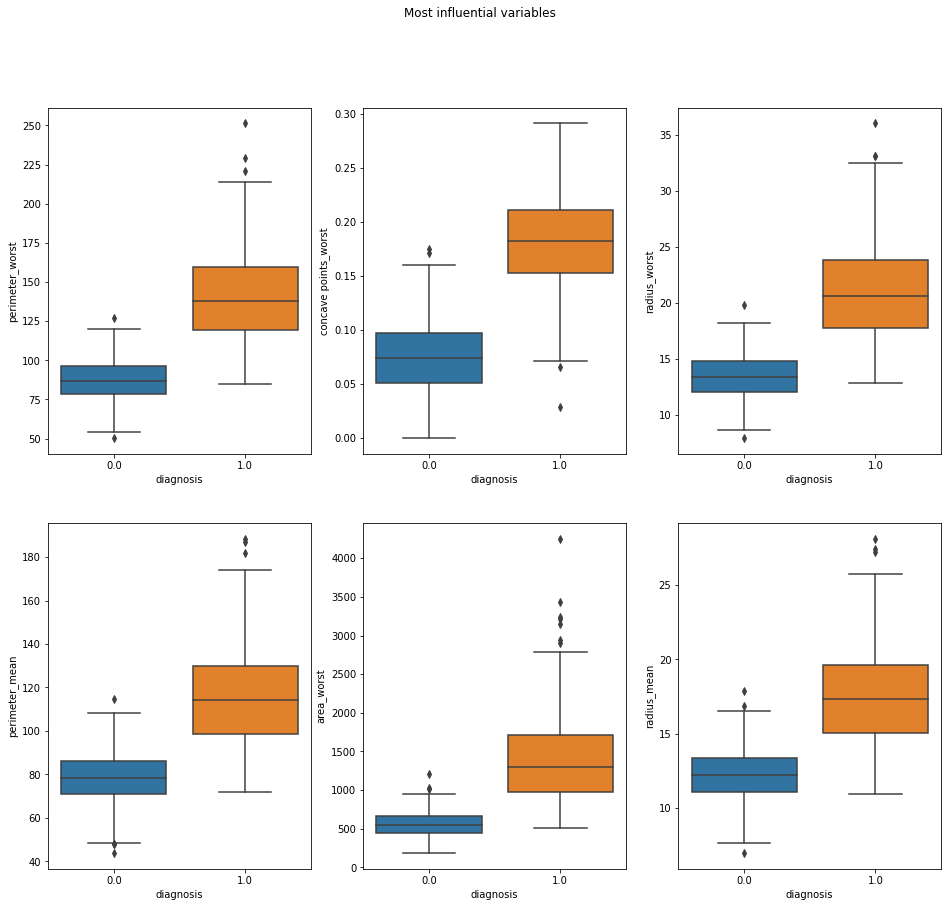

In [14]:
fig, axes = plt.subplots(2, 3, figsize=(16,14))
fig.suptitle('Most influential variables')

sns.boxplot(ax=axes[0,0], y='perimeter_worst', x='diagnosis', data=df)
sns.boxplot(ax=axes[0,1], y='concave points_worst', x='diagnosis', data=df)
sns.boxplot(ax=axes[0,2], y='radius_worst', x='diagnosis', data=df)
sns.boxplot(ax=axes[1,0], y='perimeter_mean', x='diagnosis', data=df)
sns.boxplot(ax=axes[1,1], y='area_worst', x='diagnosis', data=df)
sns.boxplot(ax=axes[1,2], y='radius_mean', x='diagnosis', data=df)

plt.show()

What if we related the 2 most influential variables to each other and the diagnosis? We would obtain a graph like the following, where as both variables increase, more cases of malignant diagnosis

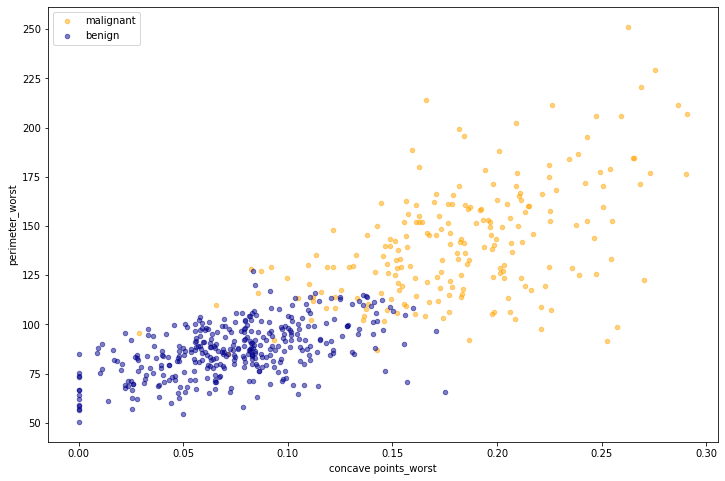

In [15]:
ax = df[df['diagnosis'] == 1.0].plot(kind='scatter', 
                                     x='concave points_worst', 
                                     y='perimeter_worst', 
                                     color='Orange', 
                                     label='malignant',
                                     alpha=0.5)
df[df['diagnosis'] == 0.0].plot(kind='scatter', 
                                x='concave points_worst', 
                                y='perimeter_worst', 
                                color='DarkBlue', 
                                label='benign', 
                                alpha=0.5,
                                figsize=(12,8),
                                ax=ax)
plt.show()

Finally, we have to take into account the size of our dataset. With a total of 569 cases (357 benign and 212 malignant, as figure shows), the number of samples may not be large enough to create a perfect model. However, its performance will be measured at the end.

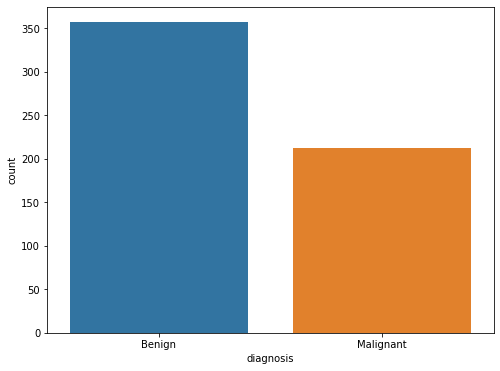

In [16]:
plt.figure(figsize=(8,6))
ax = sns.countplot(x='diagnosis', data=df)
ax.set_xticklabels(['Benign','Malignant'])
plt.show()

# 3. Data normalization

As we had previously indicated, before creating our model it is necessary to perform data normalization due to the different ranges of the variables.

We will start creating the variables, _x_ and _y_, the first for all related variables and the second for the diagnosis values.

In [17]:
df_x = df.copy()
del df_x['diagnosis']
x = np.asarray(df_x)

df_y = df[['diagnosis']]
y = np.asarray(df_y)

Now, we can normalize variable _x_:

In [18]:
x = preprocessing.StandardScaler().fit(x).transform(x.astype(float))

And finally, it's necessary split our data into train and test data. The first one will be use in our model's creation for training, and the second one will be use to predict and calculte the accuracy of our model.

We will use de 80% data for train and the 20% for test.

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
print('We will use {} samples for train and {} for test'.format(len(x_train), len(x_test)))

We will use 455 samples for train and 114 for test


# 4. Model creation

We will follow the same process for each model, recording the relevant data in a dataframe for a final comparison:
<ul>
    <li>Model creation, fit and execution time</li>
    <li>Model predict and execution time</li>
    <li>Accuracy</li>
    <li>Confusion matrix</li>
    <li>ROC and AUC</li>
</ul>

For save the results, we will use some lists to create our dataframe later:

In [20]:
models = ['Logistic Regression', 'KNN', 'Decision Trees', 'SVM']
fit_time, predict_time, acc, auc, FN, FP = [], [], [], [], [], []

To simplify the code, we will create two functions to plot the confusion matrix and the ROC figure.

In [21]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [22]:
def plot_roc_acu(fpr, tpr, logic_roc_auc):
    plt.figure(figsize=(12,8))
    plt.plot(fpr, tpr, label='AUC = %0.2f)' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

## 4.1. Logistic regression

Creating the logistic regression model, we will have to pay attention to some parameters, like C (inverse of regularization strength) or the solver (algorithm to use in the optimization problem). Which ones should we choose? The best solution will be to carry out a battery of tests with the most common values and selecting the one with the best accuracy.

In [23]:
cs = [0.001, 0.01, 0.1, 1, 10]
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
solver_r, c_r, acc_r = [], [], []
for solver in solvers:
    for c in cs:
        lr = LogisticRegression(C=c, solver=solver, max_iter=3000).fit(x_train, y_train.ravel())
        yhat = lr.predict(x_test)
        acc_score = metrics.accuracy_score(y_test,yhat)
        solver_r.append(solver)
        c_r.append(c)
        acc_r.append(acc_score)

max_acc = max(acc_r)
df_lr = pd.DataFrame({'Solver':solver_r, 'C':c_r, 'Accuracy':acc_r})        
df_lr[df_lr['Accuracy'] == max_acc]

,Solver,C,Accuracy
13,liblinear,1.0,0.982456
18,sag,1.0,0.982456
23,saga,1.0,0.982456


With multiple combinations, we will select _liblinear_ as solver and _C=1_ for our model.

We will start creating our logistic regression model, training and predicting the output for the test data. For performance stats, we will calculate the execution time for all models.

In [24]:
start_time = time.time()
lr = LogisticRegression(C=1, solver='liblinear').fit(x_train, y_train.ravel())
exec_time = time.time() - start_time
if exec_time < 0.001: exec_time = 0.001 # We will use 0.001s as minimum value
fit_time.append(exec_time)
print('Execution time for model creation and fit: {:.3f}s'.format(exec_time))
start_time = time.time()
yhat = lr.predict(x_test)
exec_time = time.time() - start_time
if exec_time < 0.001: exec_time = 0.001 # We will use 0.001s as minimum value
predict_time.append(exec_time)
print('Execution time for predict: {:.3f}s'.format(exec_time))

Execution time for model creation and fit: 0.003s
Execution time for predict: 0.001s


Now, we can check our model accuracy:

In [25]:
acc_score = metrics.accuracy_score(y_test,yhat)
acc.append(acc_score)
print('The accuracy was {:.3f}%'.format(acc_score*100))

The accuracy was 98.246%


Let's plot the confusion matrix:

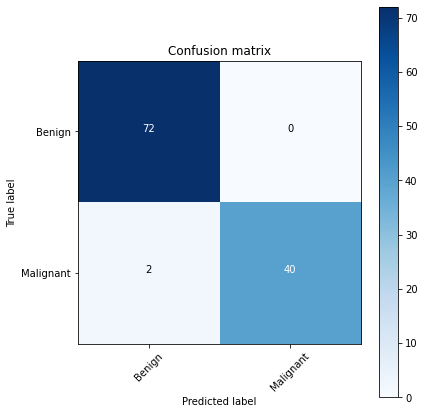

In [26]:
c_matrix = confusion_matrix(y_test, yhat)
FN.append(c_matrix[1][0])
FP.append(c_matrix[0][1])
np.set_printoptions(precision=2)
plt.figure(figsize=(6,6))
plot_confusion_matrix(c_matrix, classes=['Benign','Malignant'],normalize= False,  title='Confusion matrix')

According to the previous table, we have predicted 2 cases as benign when they were really malignant.

Logistic Regression AUC 0.98


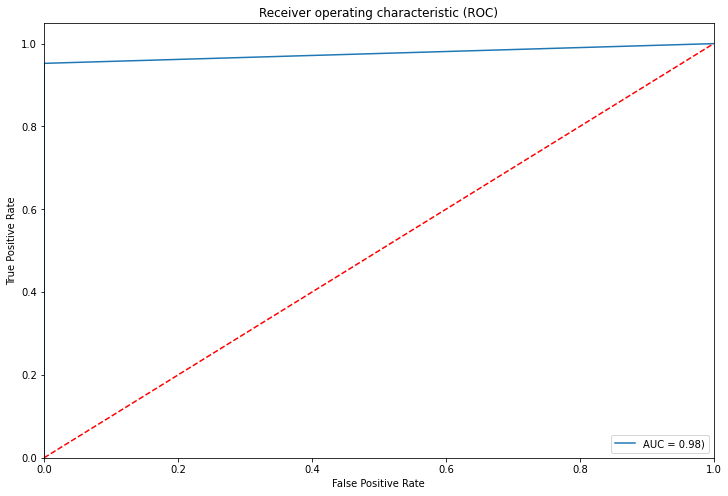

In [27]:
logit_roc_auc = roc_auc_score(y_test, yhat)
auc.append(logit_roc_auc)
print("Logistic Regression AUC {:.2f}".format(logit_roc_auc))
fpr, tpr, thresholds = roc_curve(y_test, yhat)
plot_roc_acu(fpr, tpr, logit_roc_auc)

## 4.2. KNN (K-Nearest Neighbors)

The second model we will test will be KNN. As in the previous model, in this case we will also have values to adjust, specifically the K value (number of nearby samples taken into account). Let's compare the accuracy with few k values:

The highest accuracy of 0.956 was obtained with K=5


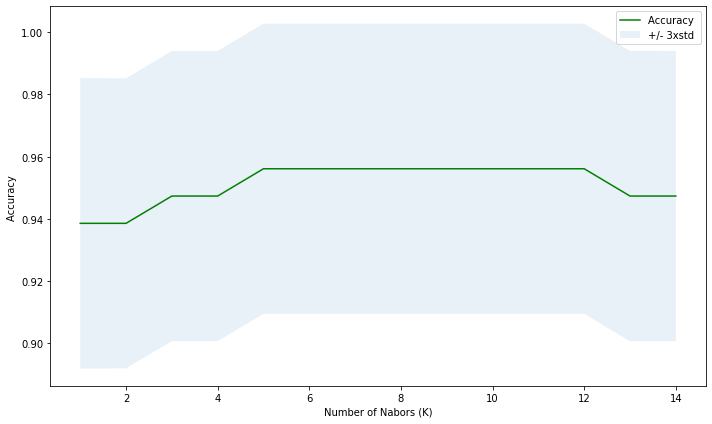

In [28]:
Ks = 15
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):   
    knn = KNeighborsClassifier(n_neighbors = n).fit(x_train, y_train.ravel())
    yhat = knn.predict(x_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)  #Calcula el rendimiento
    std_acc[n-1] = np.std(yhat==y_test)/np.sqrt(yhat.shape[0])  #Desviación estándar del rendimiento
    
print("The highest accuracy of {:.3f} was obtained with K={}".format(mean_acc.max(), mean_acc.argmax()+1))

plt.figure(figsize=(10,6))
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

As previous figure shows, the best performance was achive with K=5, so let's create our model using this value:

In [29]:
k = 5
start_time = time.time()
knn = KNeighborsClassifier(n_neighbors = 5).fit(x_train, y_train.ravel())
exec_time = time.time() - start_time
if exec_time < 0.001: exec_time = 0.001 # We will use 0.001s as minimum value
fit_time.append(exec_time)
print('Execution time for model creation and fit: {:.3f}s'.format(exec_time))
start_time = time.time()
yhat = knn.predict(x_test)
exec_time = time.time() - start_time
if exec_time < 0.001: exec_time = 0.001 # We will use 0.001s as minimum value
predict_time.append(exec_time)
print('Execution time for predict: {:.3f}s'.format(exec_time))

Execution time for model creation and fit: 0.003s
Execution time for predict: 0.007s


Now, we can check the accuracy and the confusion matrix:

In [30]:
acc_score = metrics.accuracy_score(y_test,yhat)
acc.append(acc_score)
print('The accuracy was {:.3f}%'.format(acc_score*100))

The accuracy was 95.614%


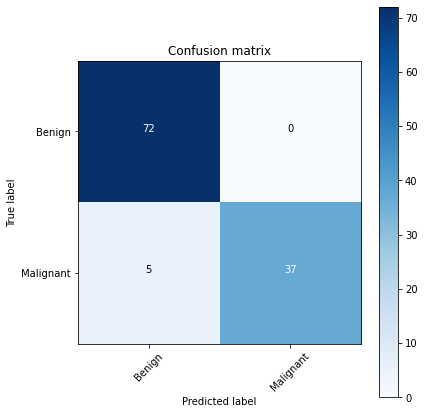

In [31]:
c_matrix = confusion_matrix(y_test, yhat)
FN.append(c_matrix[1][0])
FP.append(c_matrix[0][1])
np.set_printoptions(precision=2)
plt.figure(figsize=(6,6))
plot_confusion_matrix(c_matrix, classes=['Benign','Malignant'],normalize= False,  title='Confusion matrix')

In this model, the number of false negatives rises to 5. 

Finally, we can calculate AUC value and plot the ROC curve.

KNN AUC 0.94


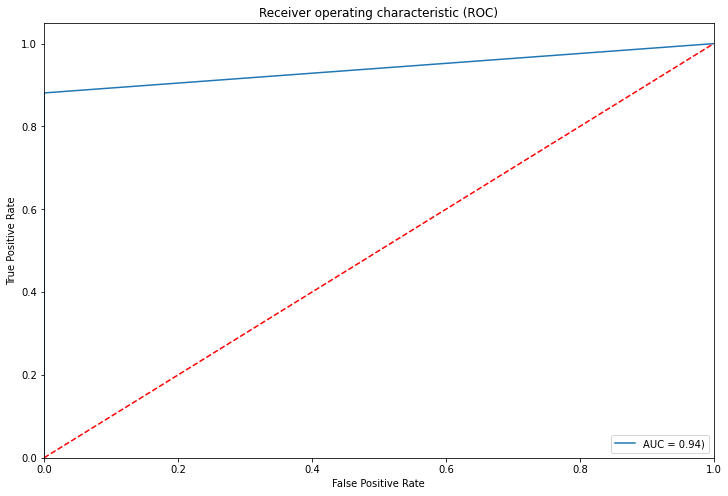

In [32]:
logit_roc_auc = roc_auc_score(y_test, yhat)
auc.append(logit_roc_auc)
print("KNN AUC {:.2f}".format(logit_roc_auc))
fpr, tpr, thresholds = roc_curve(y_test, yhat)
plot_roc_acu(fpr, tpr, logit_roc_auc)

## 4.3. Decision Trees

To create our Decision Tress model, we will use _entropy_ as the default criterion and we will not limit the depth of the tree, so it will not be necessary to perform adjustment tasks. We will start by creating, fitting and making the first prediction.

In [33]:
start_time = time.time()
dt = DecisionTreeClassifier(criterion="entropy").fit(x_train, y_train.ravel())
exec_time = time.time() - start_time
if exec_time < 0.001: exec_time = 0.001 # We will use 0.001s as minimum value
fit_time.append(exec_time)
print('Execution time for model creation and fit: {:.3f}s'.format(exec_time))
start_time = time.time()
yhat = dt.predict(x_test)
exec_time = time.time() - start_time
if exec_time < 0.001: exec_time = 0.001 # We will use 0.001s as minimum value
predict_time.append(exec_time)
print('Execution time for predict: {:.3f}s'.format(exec_time))

Execution time for model creation and fit: 0.007s
Execution time for predict: 0.001s


Now, time to check the model's accuracy and the confussion matrix

In [34]:
acc_score = metrics.accuracy_score(y_test,yhat)
acc.append(acc_score)
print('The accuracy was {:.3f}%'.format(acc_score*100))

The accuracy was 95.614%


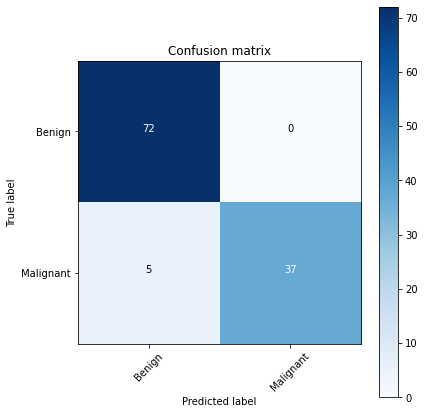

In [35]:
c_matrix = confusion_matrix(y_test, yhat)
FN.append(c_matrix[1][0])
FP.append(c_matrix[0][1])
np.set_printoptions(precision=2)
plt.figure(figsize=(6,6))
plot_confusion_matrix(c_matrix, classes=['Benign','Malignant'],normalize= False,  title='Confusion matrix')

As KNN, the number os false negatives is 5.

Let's plot the ROC and AUC.

Decision Trees 0.94


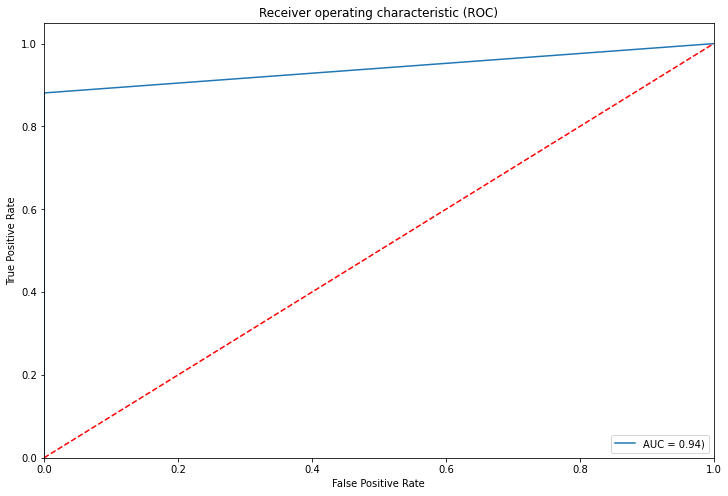

In [36]:
logit_roc_auc = roc_auc_score(y_test, yhat)
auc.append(logit_roc_auc)
print("Decision Trees {:.2f}".format(logit_roc_auc))
fpr, tpr, thresholds = roc_curve(y_test, yhat)
plot_roc_acu(fpr, tpr, logit_roc_auc)

For a visual inspection, we can plot the tree including the criteria followed.

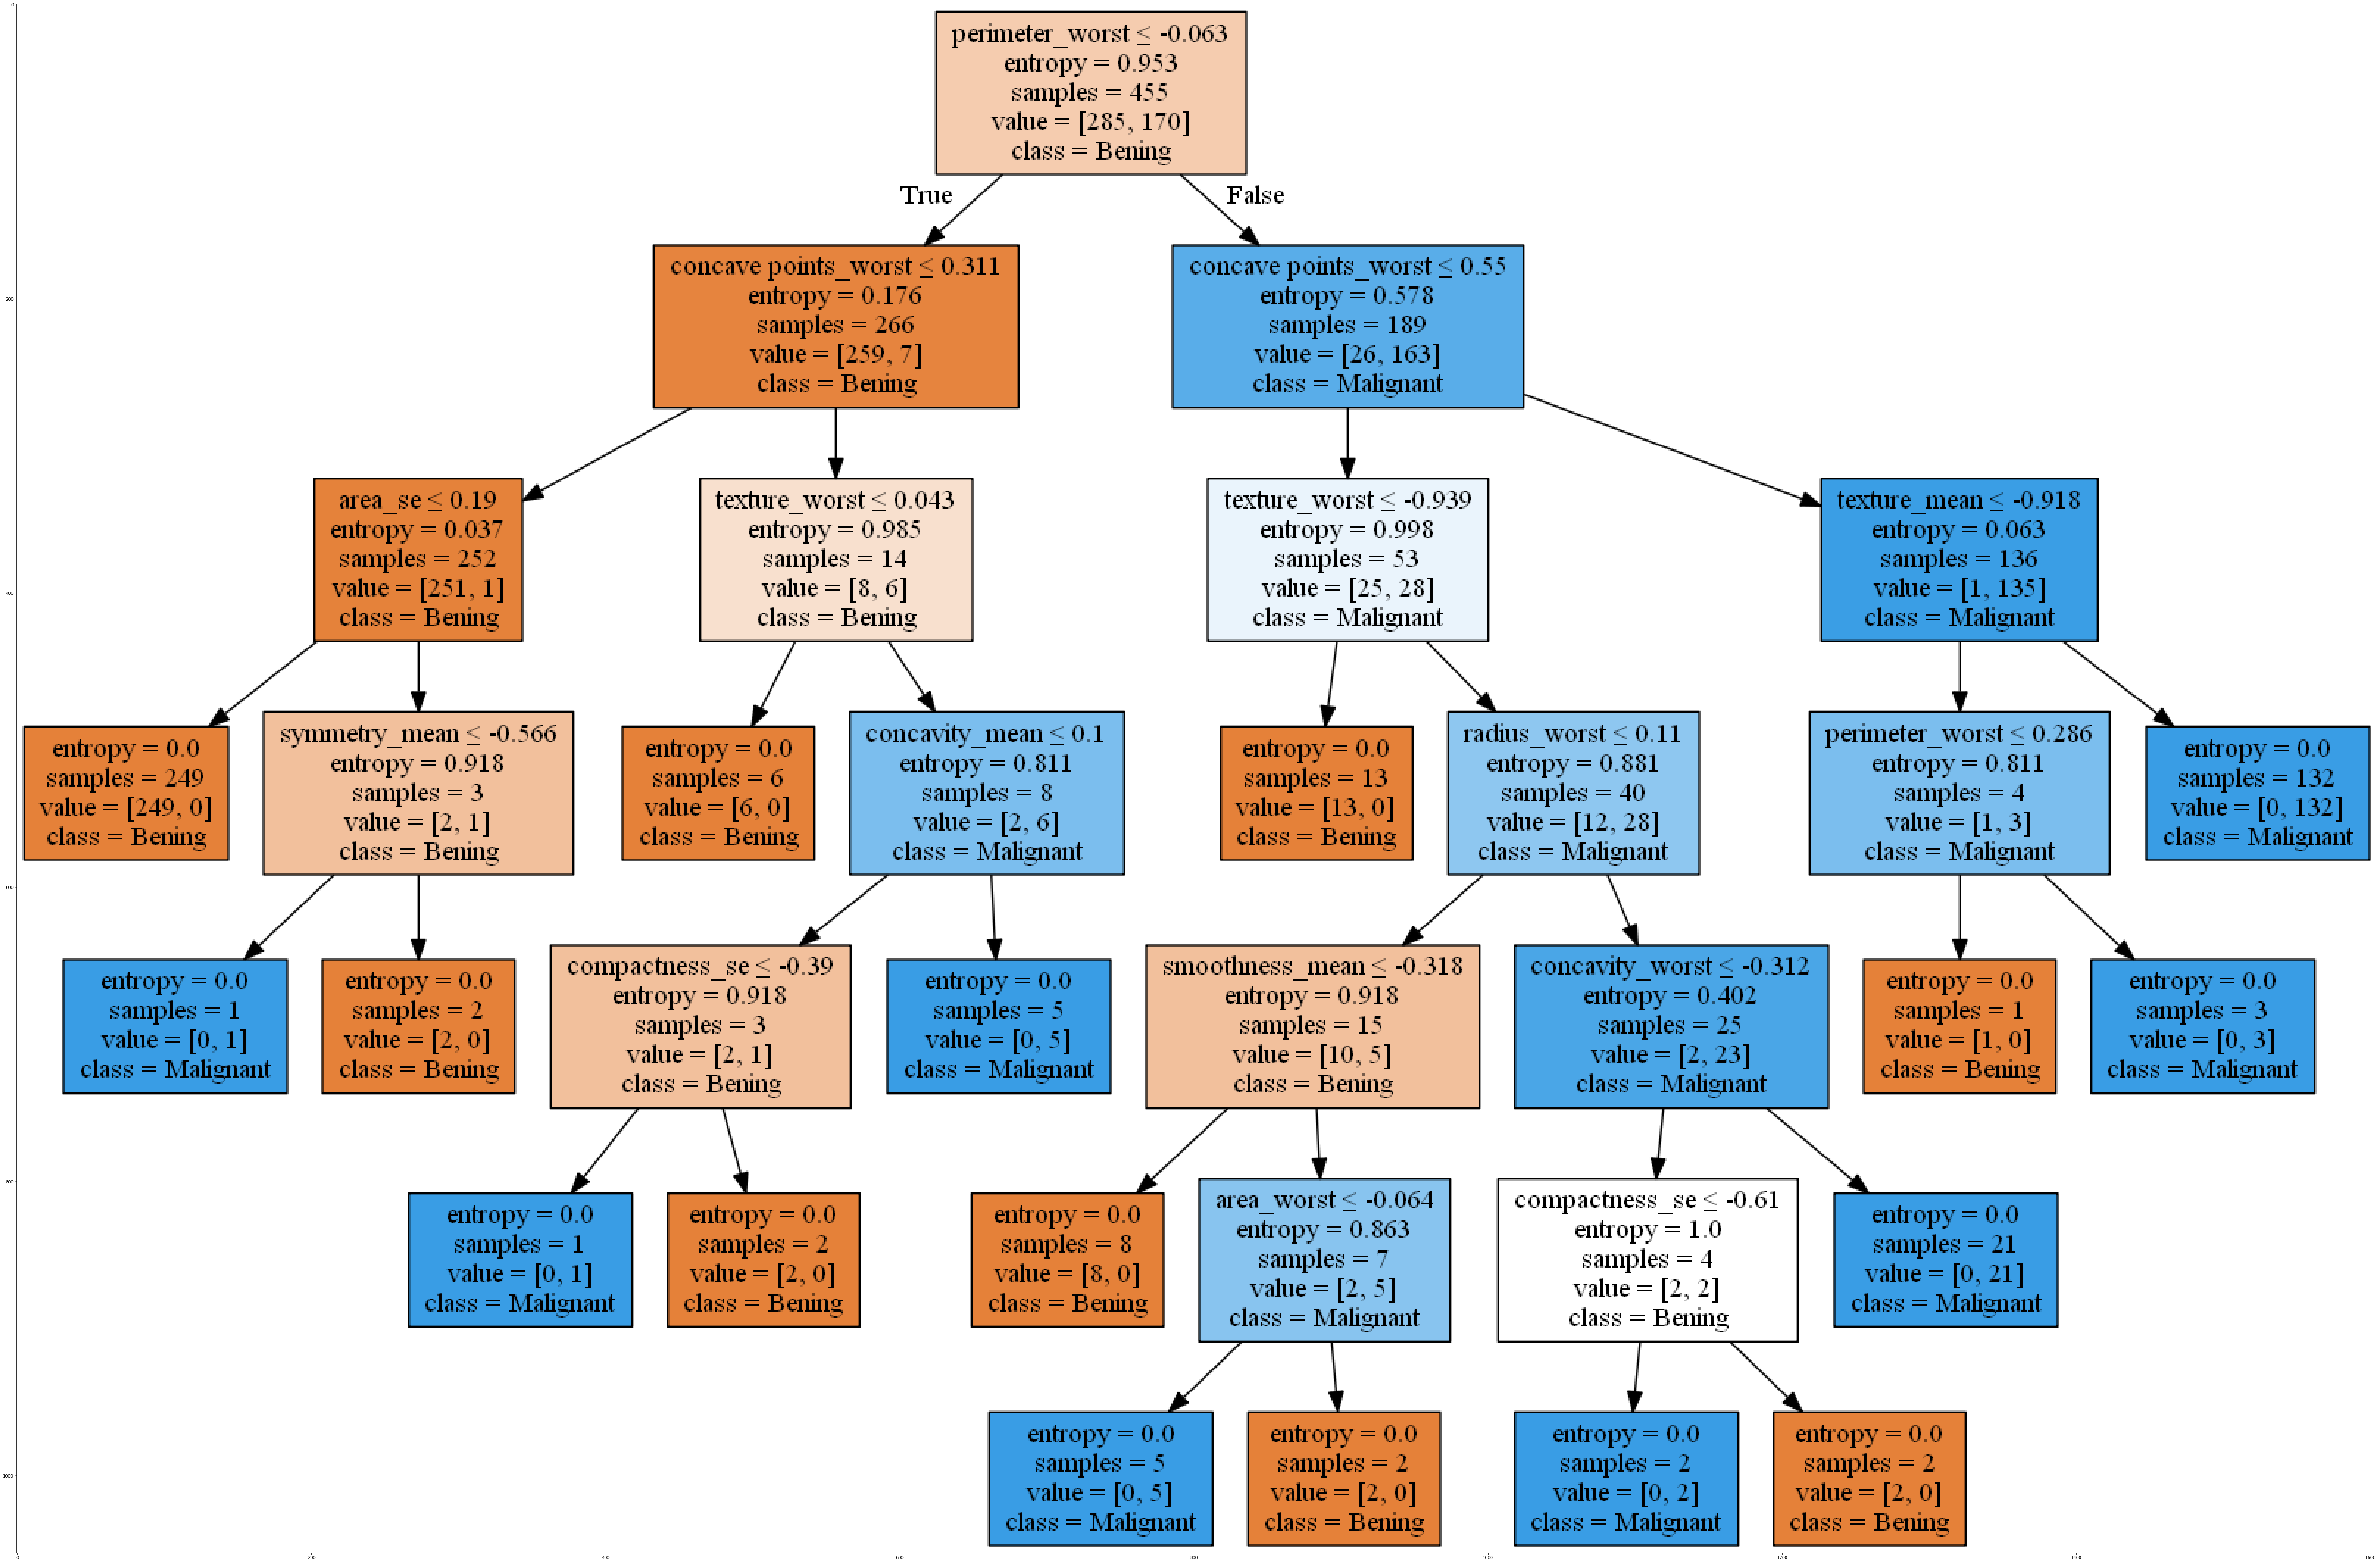

In [37]:
y_train2 = y_train
with warnings.catch_warnings():
    warnings.simplefilter(action='ignore', category=FutureWarning)
    y_train2 = np.where(y_train2==0, 'Bening', y_train2)
    y_train2 = np.where(y_train2=='1.0', 'Malignant', y_train2)

dot_data = StringIO()
filename = "breastcancer.png"
featureNames = df.columns[1:31]
targetNames = df["diagnosis"].unique().tolist()
out=tree.export_graphviz(dt,feature_names=featureNames, out_file=dot_data,  filled=True, class_names= np.unique(y_train2), special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')
plt.show()

## 4.4. SVM Support Vector Machines

As in previous models, for the SVM model we also have adjustment parameters, in this case the kernels. We will check first which one performs better.

In [38]:
type_k = ['linear', 'poly', 'rbf', 'sigmoid']
kernel_r, acc_r = [], []
for k in type_k:
    vec = svm.SVC(kernel=k).fit(x_train, y_train.ravel())
    yhat = vec.predict(x_test)
    acc_score = metrics.accuracy_score(y_test,yhat)
    kernel_r.append(k)
    acc_r.append(acc_score)

max_acc = max(acc_r)
df_svm = pd.DataFrame({'Kernel':kernel_r, 'Accuracy':acc_r})        
df_svm[df_svm['Accuracy'] == max_acc]

,Kernel,Accuracy
2,rbf,0.973684


RBF (radial basis function) performed the best result, so let's create our model using this kernel:

In [39]:
start_time = time.time()
vec = svm.SVC(kernel="rbf").fit(x_train, y_train.ravel())
exec_time = time.time() - start_time
if exec_time < 0.001: exec_time = 0.001 # We will use 0.001s as minimum value
fit_time.append(exec_time)
print('Execution time for model creation and fit: {:.3f}s'.format(exec_time))
start_time = time.time()
yhat = vec.predict(x_test)
exec_time = time.time() - start_time
if exec_time < 0.001: exec_time = 0.001 # We will use 0.001s as minimum value
predict_time.append(exec_time)
print('Execution time for predict: {:.3f}s'.format(exec_time))

Execution time for model creation and fit: 0.004s
Execution time for predict: 0.001s


Let's check the accuracy and the confusion matrix:

In [40]:
acc_score = metrics.accuracy_score(y_test,yhat)
acc.append(acc_score)
print('The accuracy was {:.3f}%'.format(acc_score*100))

The accuracy was 97.368%


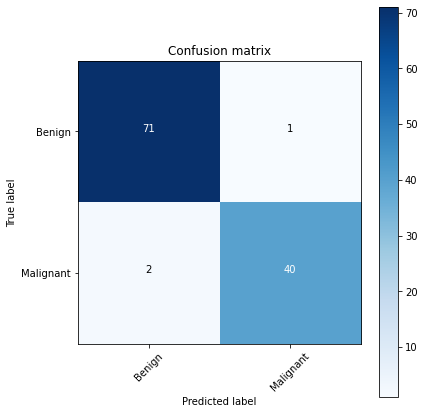

In [41]:
c_matrix = confusion_matrix(y_test, yhat)
FN.append(c_matrix[1][0])
FP.append(c_matrix[0][1])
np.set_printoptions(precision=2)
plt.figure(figsize=(6,6))
plot_confusion_matrix(c_matrix, classes=['Benign','Malignant'],normalize= False,  title='Confusion matrix')

The false negatives was 2, like logistic regression model, but for the first time in our test, we obtained a false positive value.

Finally, we can plot the ROC and AUC.

SVM 0.97


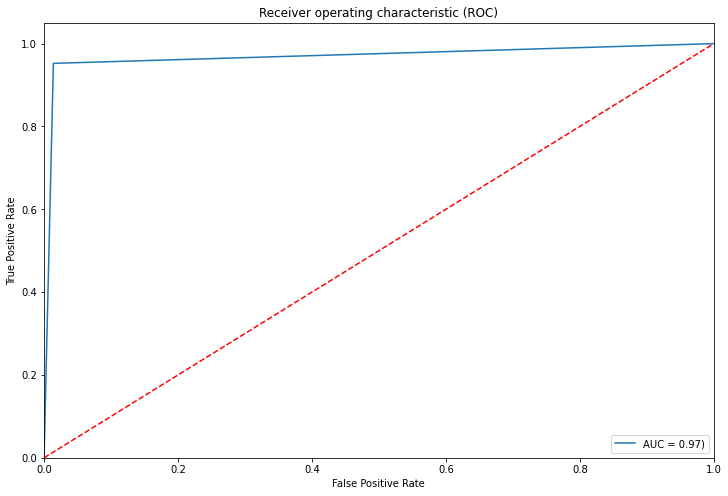

In [42]:
logit_roc_auc = roc_auc_score(y_test, yhat)
auc.append(logit_roc_auc)
print("SVM {:.2f}".format(logit_roc_auc))
fpr, tpr, thresholds = roc_curve(y_test, yhat)
plot_roc_acu(fpr, tpr, logit_roc_auc)

# 5. Model comparison

As we tested the different models, we stored the key values to determine which is the optimal model for this example of breast cancer detection. Now, we can create a dataframe to compare them:

In [43]:
results = pd.DataFrame({'Model':models, 
                        'Accuracy':acc, 
                        'AUC':auc, 
                        'False negatives':FN,
                        'False positives':FP,
                        'Fit time':fit_time,
                        'Prediction time':predict_time
                       })
results.set_index('Model', drop=True, inplace=True)
results

,Accuracy,AUC,False negatives,False positives,Fit time,Prediction time
Model,,,,,,
Logistic Regression,0.982456,0.976190,2,0,0.002997,0.001000
KNN,0.956140,0.940476,5,0,0.002972,0.006993
Decision Trees,0.956140,0.940476,5,0,0.007005,0.001000
SVM,0.973684,0.969246,2,1,0.003996,0.001000


The results are the following:
    
<ul>
    <li><b>Accuracy</b>: Although the accuracy has been excellent in all the models, <b>logistic regression</b> is the one that has clearly achieved the highest value. SVM was second best, while KNN and decision trees have tied somewhat lower</li>
    <li><b>AUC</b>: The results follow the same trend as for accuracy. <b>Logistic regression</b> gets the best value, closely followed by SVM, while the rest get the same value</li>
    <li><b>False negatives</b> and <b>false positives</b>: <b>logistic regression</b> is the winner again, with only 2 errors compared to the 3 of SVM and the 5 KNN and decision trees. Note that SVM is the only one that has obtained a false positive</li>
    <li><b>Fit time</b>: Considering it as the time necessary for the creation and training of the model, the fastest model has been <b>KNN</b>, followed closely by logistic regression. Decision trees is clearly the slowest, with a time that doubles its alternatives. However, it should be noted that registered times are negligible in all cases, not even reaching a tenth of a second, to which must be added that breast cancer detection tasks should not require real time results.</li>
    <li><b>Prediction time</b>: Here we have a triple tie between <b>logistic regression</b>, <b>decision trees</b> and <b>SVM</b>, clearly faster than KNN, the fastest fitting. Remember that 1 millisecond was the lower time recorded and may be lower.</li>
</ul>

In view of the previous results, we can conclude that __logistic regression__ is the best model for the breast cancer detection tasks analyzed in this notebook, obtaining the best accuracy results in a negligible time.

# 6. Conclusions

From the comparison of models, the high accuracy and speed they have obtained stands out. In absolute terms, all of them have achieved outstanding results. 

However, we must bear in mind that we are facing medical analyzes, and obtaining a false positive/negative less is crucial and differentiates some models from others. In this sense, logistic regression stands out above the rest, with an error probability of less than 2 samples out of 100.

If this model is put into real life, the advantage would be that the history will always continue to grow, and the new data would have influence and help the new predictions.